In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [9]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

In [11]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [12]:
df.count()

dept               86
Region             85
Department         86
Crime_pers         86
Crime_prop         86
Literacy           86
Donations          86
Infants            86
Suicides           86
MainCity           86
Wealth             86
Commerce           86
Clergy             86
Crime_parents      86
Infanticide        86
Donation_clergy    86
Lottery            86
Desertion          86
Instruction        86
Prostitutes        86
Distance           86
Area               86
Pop1831            86
dtype: int64

In [13]:
df = df.dropna()

In [14]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]

In [15]:
df.describe()

,Lottery,Literacy,Wealth
count,85.000000,85.000000,85.000000
mean,43.035294,39.141176,43.576471
std,24.741255,17.434335,25.108041
min,1.000000,12.000000,1.000000
25%,22.000000,25.000000,22.000000
50%,43.000000,38.000000,44.000000
75%,64.000000,52.000000,65.000000
max,86.000000,74.000000,86.000000


In [16]:
df['Region'].nunique()

5

In [17]:
df = pd.get_dummies(df, columns=['Region'])

In [18]:
df

,Department,Lottery,Literacy,Wealth,Region_C,Region_E,Region_N,Region_S,Region_W
0,Ain,41,37,73,0,1,0,0,0
1,Aisne,38,51,22,0,0,1,0,0
2,Allier,66,13,61,1,0,0,0,0
3,Basses-Alpes,80,46,76,0,1,0,0,0
4,Hautes-Alpes,79,69,83,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
80,Vendee,68,28,56,0,0,0,0,1
81,Vienne,40,25,68,0,0,0,0,1
82,Haute-Vienne,55,13,67,1,0,0,0,0
83,Vosges,14,62,82,0,1,0,0,0


In [19]:
y = df['Lottery']
cols = ['Literacy', 'Wealth', 'Region_E', 'Region_N', 'Region_S', 'Region_W']
x1 = df[cols]

In [23]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.07e-05
Time:                        05:06:12   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6517      9.456      4.087      0.0

Text(0, 0.5, 'Lottery')

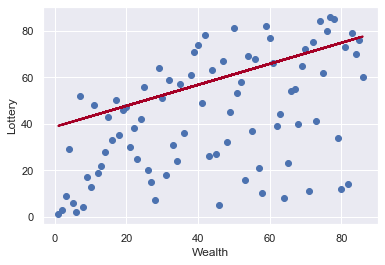

In [21]:
plt.scatter(df['Wealth'], y)
y_hat = 38.6517 + 0.4515*df['Wealth']
fig = plt.plot(df['Wealth'], y_hat, lw=2, c='#a50026')
plt.xlabel('Wealth')
plt.ylabel('Lottery')

In [32]:
fstat, pvalue = sm.stats.linear_rainbow(results)
print('Rainbow Test for Linearity')
print('F-statistic: {}'.format(fstat))
print('P-value: {}'.format(pvalue))

Rainbow Test for Linearity
F-statistic: 0.8472339976156905
P-value: 0.6997965543621665
